11490434/11490434 [==============================] - 5s 0us/step
Epoch 1/5
844/844 [==============================] - 18s 20ms/step - loss: 0.1764 - accuracy: 0.9466 - val_loss: 0.0551 - val_accuracy: 0.9838
Epoch 2/5
844/844 [==============================] - 43s 51ms/step - loss: 0.0503 - accuracy: 0.9838 - val_loss: 0.0480 - val_accuracy: 0.9863
Epoch 3/5
844/844 [==============================] - 17s 20ms/step - loss: 0.0336 - accuracy: 0.9895 - val_loss: 0.0371 - val_accuracy: 0.9897
Epoch 4/5
844/844 [==============================] - 16s 19ms/step - loss: 0.0250 - accuracy: 0.9918 - val_loss: 0.0373 - val_accuracy: 0.9895
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 0.0348 - accuracy: 0.9886
Test Accuracy: 0.9886000156402588
1/1 [==============================] - 0s 110ms/step


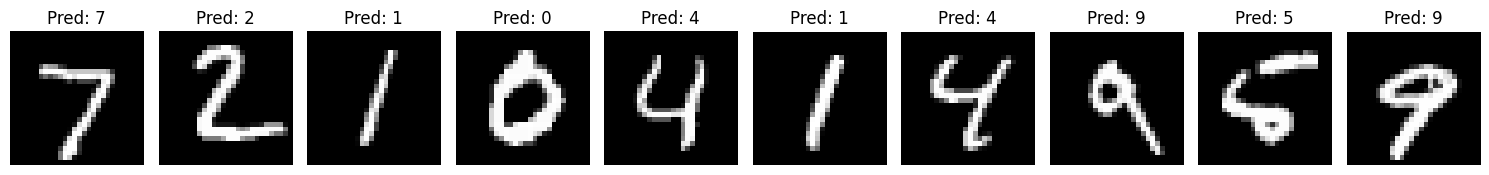

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train = X_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0
X_test = X_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0

model = models.Sequential([
    layers.Conv2D(32, kernel_size=3, activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D(pool_size=2),
    layers.Conv2D(64, kernel_size=3, activation='relu'),
    layers.MaxPooling2D(pool_size=2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_acc)

preds = model.predict(X_test[:10])
fig, axes = plt.subplots(1, 10, figsize=(15, 4))
for i, ax in enumerate(axes):
    ax.imshow(X_test[i].reshape(28, 28), cmap='gray')
    ax.set_title(f"Pred: {preds[i].argmax()}")
    ax.axis('off')
plt.tight_layout()
plt.show()
